<div style="border:solid green 4px; padding: 20px">Hello! My critical comments are highlighted with <span style='color: red;'>red</span>,  less urgent remarks are in <span style='color: #ebd731;'>yellow</span>, recommendations and extra information - in <span style='color: green;'>green</span>.</div>

## Exploratory data analysis

<div class="markdown markdown_size_normal markdown_type_theory theory-viewer__markdown theory-viewer__markdown_flexible big-theory theory-panel__big-theory"><div class="paragraph">You have files that contain the data retrieved with queries from the previous tasks. </div><div class="paragraph"><a href="https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv" target="_blank">/datasets/project_sql_result_01.csv</a> — the result of the first query. It contains the following data:</div><div class="paragraph"><em>company_name</em>: taxi company name</div><div class="paragraph"><em>trips_amount</em>: the number of rides for each taxi company on November 15-16, 2017. </div><div class="paragraph"><a href="https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv" target="_blank">/datasets/project_sql_result_04.csv</a> — the result of the second query. It contains the following data:</div><div class="paragraph"><em>dropoff_location_name</em>: Chicago neighborhoods where rides ended</div><div class="paragraph"><em>average_trips</em>: the average number of rides that ended in each neighborhood in November 2017. </div><div class="paragraph"> For these two datasets you now need to</div><ul><li>import the files</li><li>study the data they contain</li><li>make sure the data types are correct</li><li>identify the top 10 neighborhoods in terms of drop-offs</li><li>make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs</li><li>draw conclusions based on each graph and explain the results</li></ul></div>

<div style="border:solid green 4px; padding: 20px">Always pleasant to see some description.</div>

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
query_result1 = "https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_01.csv"
query_result2 = "https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_04.csv"

In [6]:
query_result1 = "./datasets/project_sql_result_01.csv"
query_result2 = "./datasets/project_sql_result_04.csv"

In [25]:
trips_amount_df = pd.read_csv(query_result1)
avg_trips_df = pd.read_csv(query_result2)

In [26]:
trips_amount_df.sample(2)

,company_name,trips_amount
48,3623 - 72222 Arrington Enterprises,20
15,Checker Taxi Affiliation,2216


In [27]:
avg_trips_df.sample(2)

,dropoff_location_name,average_trips
11,East Village,1212.066667
82,South Deering,7.500000


In [28]:
trips_amount_df.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [58]:
avg_trips_df.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [59]:
len(avg_trips_df)*0.20

18.8

identify the top 10 neighborhoods in terms of drop-offs

In [73]:
avg_trips_df.nlargest(10, columns=["average_trips"])

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

In [99]:
def plt_nlargest_pie(df, column, index, title="", top=10):
    data = df.nlargest(top, columns=[column]).set_index(index)  
    data.plot(kind='pie', y=column,autopct='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
    plt.title(title)
    plt.ylabel("")
    plt.show()   

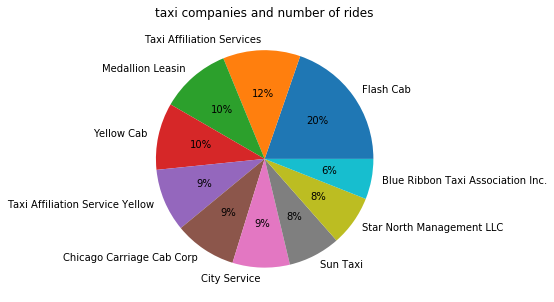

In [101]:
plt_nlargest_pie(trips_amount_df, column="trips_amount", index="company_name", title="taxi companies and number of rides")

<div style="border:solid green 4px; padding: 20px">Although I personally like barcharts over pies that is a pretty neat pie chart, I like it.</div>

As we could see, very popular was Flash Cab at November 15-16, 2017(Wednesday-Thursday), and the next one is Taxi Affiliation Services, and etc.  

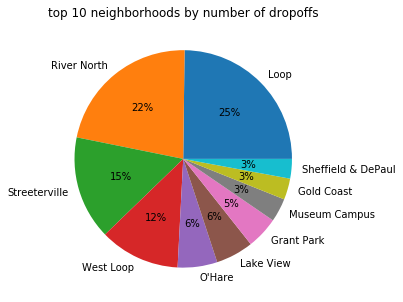

In [103]:
plt_nlargest_pie(avg_trips_df, column="average_trips", index="dropoff_location_name", title="top 10 neighborhoods by number of dropoffs")

Loop, River North and Streeterville were mostly neighborhoods by average number of rides that ended in each neighborhood in November 2017.

In [95]:
top20_dropoff = avg_trips_df.nlargest(20, columns=["average_trips"])
others_dropoff = pd.DataFrame(dict(dropoff_location_name=["Others"],average_trips=[avg_trips_df[~avg_trips_df["dropoff_location_name"]
              .isin(top20_dropoff["dropoff_location_name"])]["average_trips"]
              .sum()]))

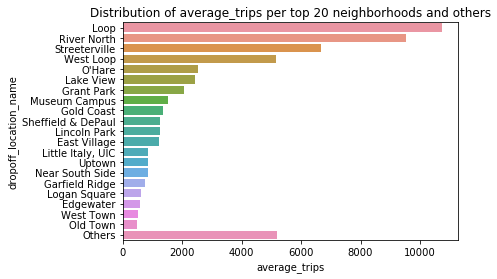

In [96]:
sns.set_color_codes("pastel")
sns.barplot(y="dropoff_location_name",x='average_trips', data=pd.concat([top20_dropoff, others_dropoff]))
sns.set_color_codes("muted")
plt.title("Distribution of average_trips per top 20 neighborhoods and others")
plt.show()

<div style="border:solid green 4px; padding: 20px">Grouping small values into unified bar is always a good idea. Strictly speaking, there is no need in setting any color scheme to that chart, you don't encode any other variable in your colors, your values already expressed by the length of bars.</div>

## Testing hypotheses

<div class="markdown markdown_size_normal markdown_type_theory theory-viewer__markdown theory-viewer__markdown_flexible big-theory theory-panel__big-theory"><div class="paragraph"><strong>Step 5. Testing hypotheses (Python)</strong></div><div class="paragraph"><a href="https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv" target="_blank">/datasets/project_sql_result_07.csv</a> — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport. Remember, these are the table's field values:</div><ul><li><em>start_ts</em> <ul><li>pickup date and time</li></ul></li><li><em>weather_conditions</em> <ul><li>weather conditions at the moment the ride started</li></ul></li><li><em>duration_seconds</em> <ul><li>ride duration in seconds</li></ul></li></ul><div class="paragraph">Test the hypothesis:</div><div class="paragraph">"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays." </div><div class="paragraph">Decide where to set the significance level (alpha) on your own.</div><div class="paragraph">Explain:</div><ul><li>how you formed the null and alternative hypotheses</li><li>what criterion you used to test the hypotheses and why</li></ul></div>

In [17]:
rides_df = "https://code.s3.yandex.net/learning-materials/data-analyst-eng/project_sql_result_07.csv"
rides_df = "./datasets/project_sql_result_07.csv"

In [104]:
rides_df = pd.read_csv(query_result3)

In [105]:
rides_df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [114]:
rides_df.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

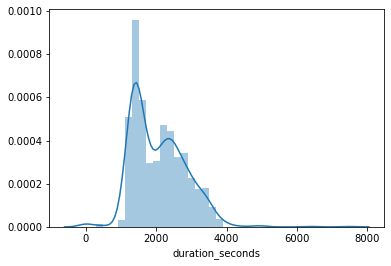

In [129]:
sns.distplot(rides_df["duration_seconds"], bins=list(range(100, 4000, 200)))

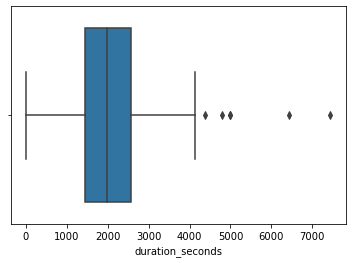

In [112]:
sns.boxplot(rides_df["duration_seconds"])

<div style="border:solid green 4px; padding: 20px">Good use of seaborn to look into distribution.</div>

In [110]:
rides_df["duration_seconds"].skew()

0.9146993095472892

In [135]:
rides_df["start_ts"] = pd.to_datetime(rides_df["start_ts"])

In [152]:
saturdays_bad_rides = rides_df[(rides_df["start_ts"].dt.weekday==5)&(rides_df["weather_conditions"]!="Good")]["duration_seconds"].values

In [150]:
saturdays_good_rides = rides_df[(rides_df["start_ts"].dt.weekday==5)&(rides_df["weather_conditions"]=="Good")]["duration_seconds"].values

In [160]:
len(saturdays_bad_rides), len(saturdays_good_rides)

(180, 888)

In [161]:
alpha = .05 

Let's choose standard the significance level (actually it really depends on sample size, but anyway let's leave standard level) and let's state:

$H_0$="The average duration of rides from the Loop to O'Hare International Airport doesn't change"

$H_1$="The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

we will test by avg value and after that also will check both avg values

<div style="border:solid green 4px; padding: 20px">Hypotheses are stated correctly.</div>

In [147]:
H_0 = "The average duration of rides from the Loop to O'Hare International Airport doesn't change"
H_1 = "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

In [162]:
result = stats.ttest_ind(saturdays_bad_rides, saturdays_good_rides)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print(H_1)
else:
    print(H_0)
print("checking:")
print(f"bad weather, mean={saturdays_bad_rides.mean():.2f}")
print(f"good weather, mean={saturdays_good_rides.mean():.2f}")

pvalue: 6.517970327099473e-12
The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.
checking:
bad weather, mean=2427.21
good weather, mean=1999.68


<div style="border:solid green 4px; padding: 20px">Okay, I am glad that now we could draw conclusions from the results of our SQL queries. Keep up the good work, see you!</div>